<a href="https://www.kaggle.com/code/jonasaacampos/o-desastre-do-titanic-dados-dsppn?scriptVersionId=122369567" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

[//]: # (Title: O desastre do Titanic dados)
[//]: # (Author: Jonas Campos)
[//]: # (Date: March 16, 2023)
[//]: # (Comment: Análise exploratória e preditiva dos dados do titanic, enviados na competição de dados do kaagle "Titanic - Machine Learning from Disaster") 
[//]: # (Tags: #python, #eleicoes, #tse)  

[![](https://img.shields.io/badge/feito%20com%20%E2%9D%A4%20por-jaac-cyan)](https://github.com/jonasaacampos)
[![LinkedIn Badge](https://img.shields.io/badge/LinkedIn-Profile-informational?style=flat&logo=linkedin&logoColor=white&color=0D76A8)](https://www.linkedin.com/in/jonasaacampos)


# DataSicence para pessoas normais

Neste episódio, vamos narrar uma tragédia conhecida ocorrida em 14 de abril de 1912, mas ao invés de usar liguagens do cinena, fotografia ou documentos históticos, vamos utilizar dados da lista de embarque.

## Mas como isso funciona?

Com apenas da lista de passageiros, vamos utilizar análises estatísticas para contar a história. Há duas maneiras de ler o conteúdo:

1. Leia as parte de texto e as figras. Se você naõ quiser saber como eu cheguei ao resultado, mas quer uma boa história com base em dados reais do aciente, pule as céluas de código
2. Como um livro, na sequencia: aqui você vai rolando a página e observa a história e como eu fiz para chegar a conclusão que apresento.


## Roteiro da História (ou checklist para uma boa análise)

- [x] Visão geral da hitória
    - [x] Definição do problema
- [x] Obtenção dos dados
    - [x] Descrição geral dos dados
- [x] Exploração dos dados
- [x] Preparação e limpeza dos dados
- [x] Modelagem
- [x] Avaliação do modelo preditivo


## Visão geral da hisória

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Titanic_Starboard_View_1912.gif/1920px-Titanic_Starboard_View_1912.gif)


> A construção teve início em março de 1909 e seu lançamento ao mar ocorreu em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".

> O número exato de mortos no naufrágio é incerto devido a vários fatores, como confusão sobre a lista de passageiros, que incluía nomes de pessoas que cancelaram a viagem no último momento e o fato de alguns passageiros terem embarcado sob pseudônimos. 
> 
> O número total de mortos já foi colocado entre 1490 e 1635 pessoas. O número mais aceito é aquele da Junta Comercial britânica, 1514 mortos.

### Definição do problema

- Se o Titanic afundasse hoje, considerando que estivesse com a mesma população da época, qual a caraterística que garantiu a sobreviênvia ou não dos passageiros?

- Quais as características levaram a uma maior chance de sobrevivência?

### Métrica de desempenho

- Para análise exploratória serão realizadas análises estatísticas que descrevam o conjunto de dados, e alguns gráficos para uma compreensão rápida das informações

- Para análise do modelo preditivo, utilizaremos o _score_, que mostra o a acurácia do modelo, ou seja, *quantas vezes nosso modelo conseguiu prever de maneira correta se uma pessoa sobreviveria ao desastre*

## Obtenção dos dados

O conjunto de dados (dtaset) contém informação da tripulação registrada pelo oficial de embarque. Os dados estão disponíveis em formato de texto (.csv) que pode ser lidos por editores de planilhas.

Os dados já estavam relativamente limpos, e estão disponíveis no kaagle, e podem ser acessados [neste link](https://www.kaggle.com/competitions/titanic). As previsões serão enviadas para o kaggle para registrar minha participação na competição de dados.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # make charts
import seaborn as sns # make charts
import warnings # don't show warnings

warnings.filterwarnings('ignore')

# permitir visualizar todas as colunas
pd.options.display.max_columns = None

# renderizar os gráficos diretamento no notebook
# %matplotlib inline

# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Exploração dos dados

### Dicionário de dados

Acima visualizamos uma amostra dos dados (as 5 primeiras linhas), mas as da forma que estão nomeadas, não trazem toda a clareza necessária para o leitor. Por isso todo conjunto de dados que se preze, traz consigo um dicionário de dados, que nada mais é que a explicação de que informação aquela determinada coluna contém. 

- **Survived:** Sobreviviente? 0 = Não 1 = Sim
- **pclass:** Classe econômica da acomodação. Possui três valores
    - 1 = Alta
    - 2 = Média
    - 3 = Baixa
- **Sex:** Sexo do passageiro
- **age:** Idade do passageiro. Para menores que 1 ano, o valor é decimal.
- **sibsp:** Determina a quantidade de irmãos e esposa/marido que embarcaram. (parentes laterais). Noivos e amantes não foram considerados
- **parch:** Determina a quantidade pais, mães e filhos que embarcaram (parentes ascendentes e descendentes). Para crianças que foram sozinhas com a babá, foi inserido o número 0.
- **Ticket:** Número do bilhete de embarque
- **Fare:** Valor da passagem
- **Cabin:** Número da cabine
- **Embarked:** Porto de Embarque (C = Cherbourg Q = Queenstown S = Southampton)


Para facilitar a compreensão, vou alterar o nome das colunas do nosso conjunto de dados.

In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_columns_original = df.columns
df_columns_original

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
colunas = ['id_passageiro', 
           'sobrevivente', 
           'classe', 
           'nome', 
           'sexo', 
           'idade', 
           'parentes_lat', 
           'parentes_asc', 
           'n_passagem', 
           'valor_pago', 
           'cabine', 
           'local_embarque'
          ]

df.columns = colunas

df.tail()


,id_passageiro,sobrevivente,classe,nome,sexo,idade,parentes_lat,parentes_asc,n_passagem,valor_pago,cabine,local_embarque
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

Agora temos uma amostra das 5 últimas linhas da nossa lista de embarque, com os nomes das colunas alterados. E a informação do método `shape` nos trouxe (891, 12), ou seja, temos **812 linhas e 12 colunas** neste dataframe.


In [6]:
#df.describe(include='object')

In [7]:
# verifica e conta valore nulos
df.isnull().sum()

id_passageiro       0
sobrevivente        0
classe              0
nome                0
sexo                0
idade             177
parentes_lat        0
parentes_asc        0
n_passagem          0
valor_pago          0
cabine            687
local_embarque      2
dtype: int64

Agora que não temos mais valores nulos, podemos fazer um resumo dos nossos dados e já tirarmos algumas conclusões interessantes acerca da pupulação

In [8]:
df.describe()

,id_passageiro,sobrevivente,classe,idade,parentes_lat,parentes_asc,valor_pago
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


O método `describe` traz as principais medidas estatísticas (medidas de tendência central).

- Contagem
- Média
- Desvio Padrão
- Valor mínimo
- 1º Percentil
- 2º Percentil
- 3º Percentil
- Valor Máximo

Este simples método é poderoso, e embora a princípio pareça caótico, ele percorre todo o conjunto de dados (as 891 linhas e 12 colunas) e faz a análise pra gente.


Só com estes resumo, posso de afimar, que de todos os tripulantes da lista de embarque:

- [x] O mais velho tem 80 anos
- [x] O mais novo tem 0,42 anos (cerca de 5,5 meses)
- [x] a maior quantidade de irmão de uma mesma família foi 8
- [x] a maior família possui 6 membros
- [x] a maior tarifa foi USD\$ 512




In [9]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values * 100
    summ['%missing'] = df.isnull().sum().values / len(df)
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ

In [10]:
summary(df)

data shape: (891, 12)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
id_passageiro,int64,0,0.000000,891,1.0,891.0,1,2,3
sobrevivente,int64,0,0.000000,2,0.0,1.0,0,1,1
classe,int64,0,0.000000,3,1.0,3.0,3,1,3
nome,object,0,0.000000,891,NaN,NaN,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina"
sexo,object,0,0.000000,2,NaN,NaN,male,female,female
idade,float64,17700,0.198653,88,0.42,80.0,22.0,38.0,26.0
parentes_lat,int64,0,0.000000,7,0.0,8.0,1,1,0
parentes_asc,int64,0,0.000000,7,0.0,6.0,0,0,0
n_passagem,object,0,0.000000,681,NaN,NaN,A/5 21171,PC 17599,STON/O2. 3101282
valor_pago,float64,0,0.000000,248,0.0,512.3292,7.25,71.2833,7.925


### Sobreviventes

Se os nossos dados de sobreviventes possuem apenas os valores 0 para não e 1 para sim, podemos também fazer mais uma afirmação: Quantas pessoas sobreviveram ao desatre.



In [11]:
# verificando quantos valores únicos existem na coluna sobrevivente
df['sobrevivente'].unique()

array([0, 1])

In [12]:
# contagem de valores únicos
df['sobrevivente'].value_counts()

0    549
1    342
Name: sobrevivente, dtype: int64

- [x] sobreviram 342 pessoas ao desastre.

Mas essa visualização pode ser melhoror do que apenas dois números, embora eficaz, temos que fazer cálculos mentais de quantas pessoas haviam, quantos morreram, a proporção de sobreviventes ou mortos.

Já temos uma visão geral dos dados. Agora vamos aprofundar um pouco mais nossas análises. Vou começar separando nossas variáveis.

**Variáveis** representam uma característica dos elementos de uma população. No nosso caso, a população são os tripulantes do titanic.

Em estatístca, as variáveis podem ser **qualitativas** (que representam uma classificação, um rótulo para cada individuo) ou **quantitativas** (que representam medições ou contagens). Vamos abaixo separar as variáveis por tipo:

Qualitativas (ou categóricas)
- sobrevivente
- classe
- sexo
- local_embarque

Quantitativas

- idade
- parentes_lat
- parentes_asc
- valor_pago 



In [13]:
# Plot categorical features
def plot_cat(data: None, feature: None, ax: None):
    sns.countplot(data=data, x=feature, ax=ax)
    ax.set_title(feature)

    
# Plot numerical features
def plot_num(data: None, feature: None, ax: None):
    sns.histplot(data=data, x=feature, ax=ax, element='step')
    ax.set_title(feature)
    
# Plot categorical features Vs. "Survived"
def plot_cat_vs_survived(data: None, feature: None, ax: None):
    sns.countplot(data=df, x=feature, hue='sobrevivente', ax=ax)
    ax.set_title(feature)

In [14]:
# Select only categorical features
cat_fet = df[['sobrevivente', 'classe', 'sexo', 'local_embarque']]

# Select only numeric features
num_fet = df[['idade', 'parentes_lat', 'parentes_asc', 'valor_pago']]

# Create a list of categorical features
cat_cols = cat_fet.columns
# Create a list of categorical features
cat_cols = cat_fet.columns

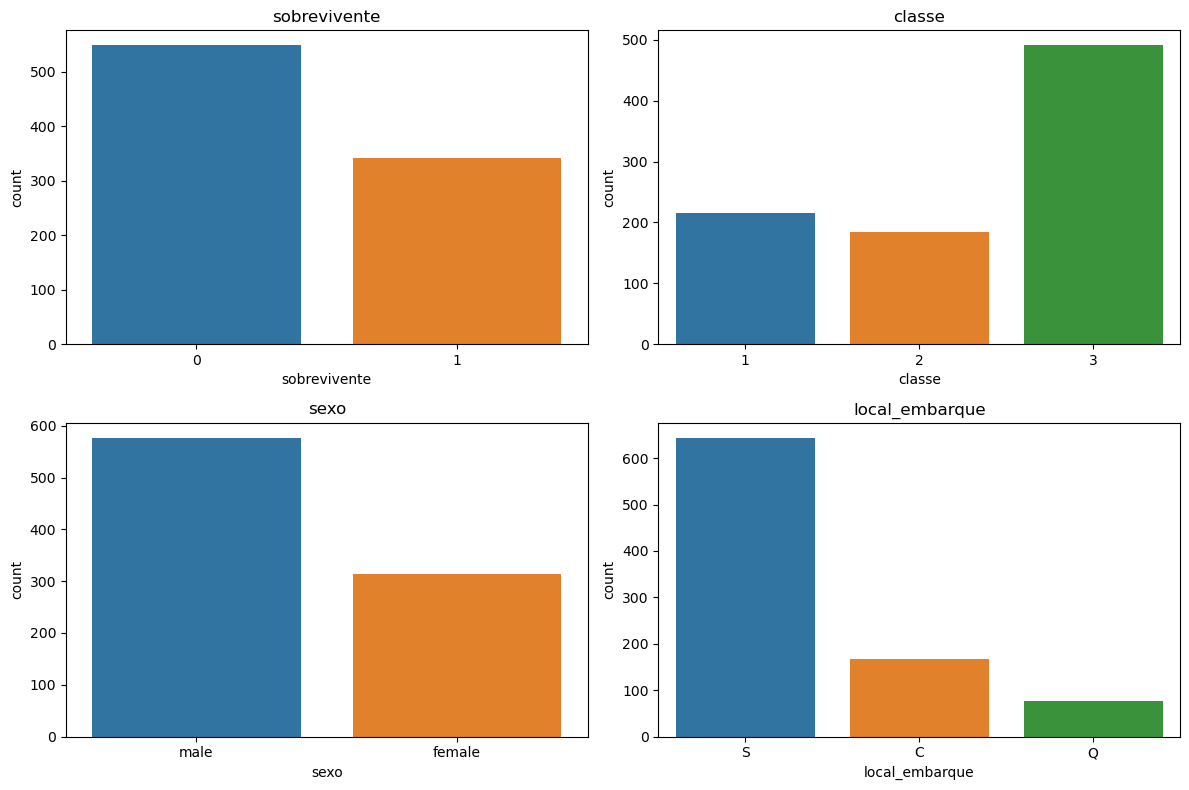

In [15]:
# Plot all categorical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, col in enumerate(cat_cols):
    row, col_idx = i // 2, i % 2
    plot_cat(data=df, feature=col, ax=axes[row, col_idx])

fig.tight_layout()
plt.show()


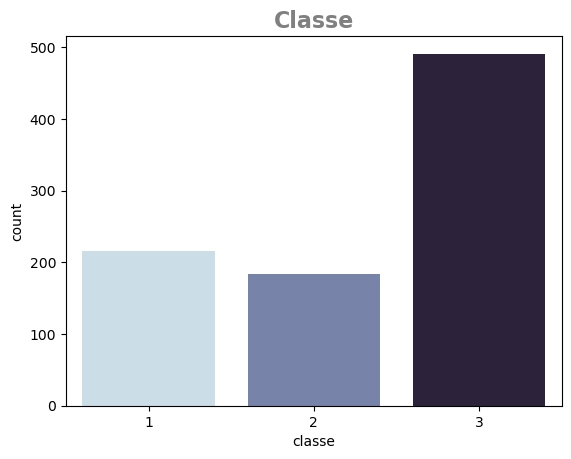

In [16]:
chart = sns.countplot(x="classe", data=df, palette="ch:s=.25,rot=-.25")
chart.set_title("Classe", fontdict={"size":16, "weight":"bold", "color": "grey"})
plt.show()

### Análise multivariada (multivariate analisys)

Até agora, observamos cada variável de maneira isolada para termos uma visão geral da nossa tripulação. Mas Podemos ir mais a fundo, analisando o relacionamento entre as variáveis, para que possamos observar qual característica dos passageiros contribuiu para a sua sobrevivência.

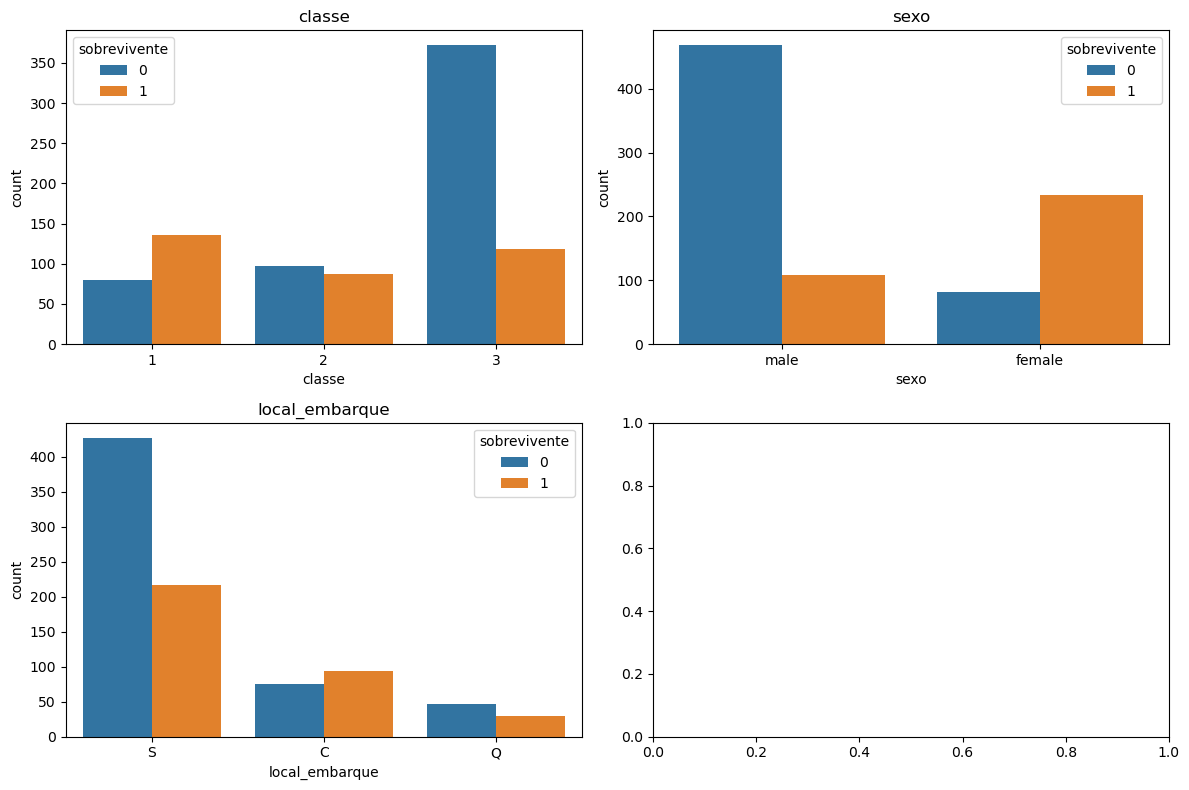

In [17]:

# Plot all categorical features with "Survived"
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, col in enumerate(cat_cols):
    if col == 'sobrevivente':
        continue
    else:
        row, col_idx = (i-1) // 2, (i-1) % 2
        plot_cat_vs_survived(data=df, feature=col, ax=axes[row, col_idx])

# Swap the upper left and bottom right subplots using array indexing
axes[0, 0], axes[1, 1] = axes[1, 1], axes[0, 0]

fig.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

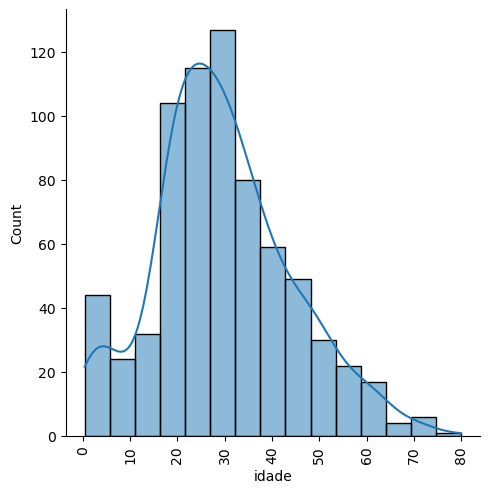

In [18]:
plt.figure(figsize=(15,6))
sns.displot(df["idade"], kde=True, bins=15)
plt.xticks(rotation=90)
plt.show()

In [19]:
df['parentes_lat'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [20]:
df["parentes_lat"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: parentes_lat, dtype: int64

In [21]:
df['parentes_asc'].unique()

array([0, 1, 2, 5, 3, 4, 6])

## Preparação e limpeza dos dados

Agora que já compreendemos nossos dados, vamos retornar o nome original das colunas, para depois abrir nosso conjunto de testes e fazer nossas análises. 

Aqui vamos preparar nossa base de dados para fazer nossas predições. Vamos também carregar nosso conjunto de dados de testes.


In [22]:
df.columns = df_columns_original
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
"""
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
"""
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [24]:
# Vamos unir os dois conjunto de dados em apenas 1 para fazer a limpeza dos dados
# para isso vamos guardar o índice de cada dataset, para posteiormente fazermos a separação
index_train = df.shape[0]
index_test = df_test.shape[0]

Vamos salvar as informações de sobreviventes na nossa variável alvo, depois remover a coluna sobreviventes do nosso conjunto de dados.

Afinal, queremos descobrir quem foi ou não sobrevivente. 

In [25]:
target = df['Survived'].copy()
df.drop(['Survived'], axis=1, inplace=True)

In [26]:
train, test = df, df_test

In [27]:

df_full = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_full.shape[0], df_full.shape[1]))

df_merged.shape: (1309 x 11)


In [28]:
df_full.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [29]:
df_full.duplicated().sum()

0

Vimos que não existem linhas repetidas, mas que algumas colunas estão sem preenchimento:

- sexo: faltam 263 registros. Os registros serão preenchidos com a média de idade de todos os passageiros
- cabine: faltam 1014 registros. Os registros serão preenchidos com o valor mais frequente (moda)
- local_embarque: faltam 2 registros. Os registros serão preenchidos com o valor mais frequente (moda)
- taxa_embarque: falta 1 registro. Será preenchido com o valor mais frequente (moda)

In [30]:
df_full['Age'].fillna(df_full['Age'].mean(), inplace=True)
df_full['Cabin'].fillna(df_full['Cabin'].mode()[0], inplace=True) # o índex [0] é para que seja considerado apenas o valor, e não o índice
df_full['Embarked'].fillna(df_full['Embarked'].mode()[0], inplace=True)
df_full['Fare'].fillna(df_full['Fare'].mode()[0], inplace=True)

In [31]:
df_full.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Modelagem de dados

- Excluir colunas com valores irrelevates para análse
- Verificar correlação entre os dados

In [32]:
# salvar coluna de id do passgeiro para submissão
id_passageiro = test['PassengerId']

In [33]:
df_full.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [34]:
#df_full.groupby(by=['Pclass', 'Sex']).sum().groupby(level=[0]).cumsum()

In [35]:
df_corr = df_full.corr()
df_corr

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.366371,0.060832,0.018322,-0.558740
Age,-0.366371,1.000000,-0.190747,-0.130872,0.170619
SibSp,0.060832,-0.190747,1.000000,0.373587,0.160388
Parch,0.018322,-0.130872,0.373587,1.000000,0.221668
Fare,-0.558740,0.170619,0.160388,0.221668,1.000000


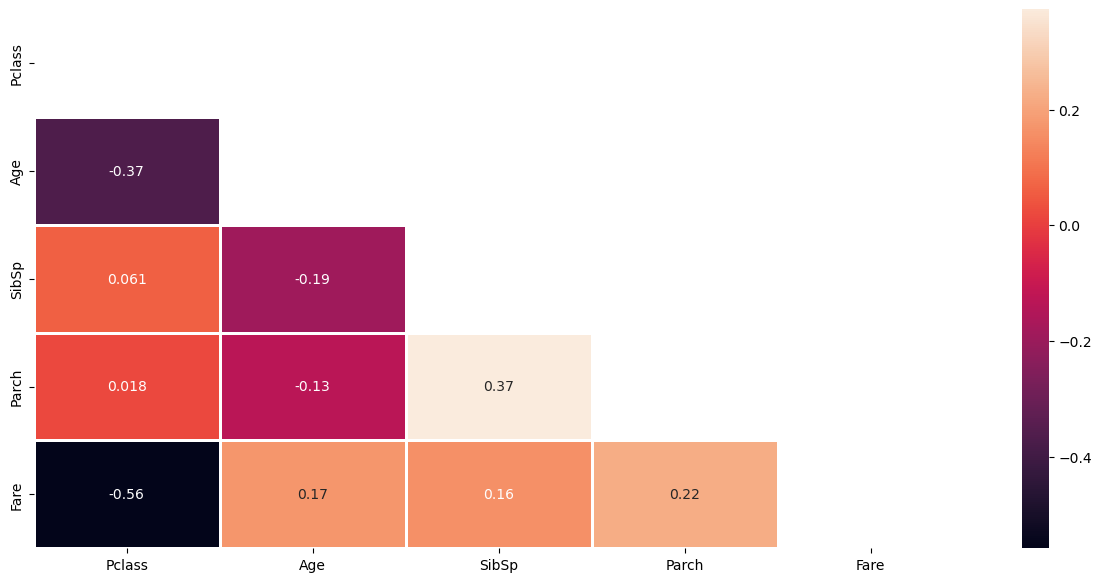

In [36]:
plt.figure(figsize=(15,7))
matrix = np.triu(df_corr)
sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap="rocket")
plt.show()

### Alterando dados

- alterar valores textuais para 0 e 1
- usar variáveis dummies

> Em inglês, a palavra “dummy” significa “manequim” que é utilizado para representar pessoas reais. Fazendo uma analogia,  a variável dummy é um artifício criado para representar as variáveis qualitativas de forma numérica. Variáveis dummies também são chamadas “dicotômicas” e “binárias” e são formadas a partir de variáveis qualitativas com duas categorias que se excluem mutuamente.Essas categorias são sempre associadas com dois valores discretos,  geralmente o 0 e 1. 
>[Blog Profª Fernanda Maciel](https://blog.proffernandamaciel.com.br/variavel_dummy/)

In [37]:
df_full['Sex'] = df_full['Sex'].map({'male': 0, 'female': 1})

In [38]:
# variáveis Dummy
embarked_dummies = pd.get_dummies(df_full['Embarked'], prefix='Embarked')

# concatenar as variáveis dummies ao df_full
df_full = pd.concat([df_full, embarked_dummies], axis=1)

#remover coluna de local de embarcação
df_full.drop('Embarked', axis=1, inplace=True)

In [39]:
df_full

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.000000,1,0,7.2500,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,0
2,3,1,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,3,0,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,3,0,29.881138,0,0,8.0500,0,0,1
1305,1,1,39.000000,0,0,108.9000,1,0,0
1306,3,0,38.500000,0,0,7.2500,0,0,1
1307,3,0,29.881138,0,0,8.0500,0,0,1


## Dividir dados em conjunto de treino e teste

In [40]:
#recuperar índices
train = df_full.iloc[:index_train]
test = df_full.iloc[:index_test]

In [41]:
# carregando dataset para teste de linha de base

baseline = pd.read_csv('/kaggle/input/titanic/gender_submission.csv', index_col=None)

In [42]:
baseline

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [44]:
#criação do modelo
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

LogisticRegression(solver='liblinear')

In [45]:
# verificar acurária
acc_log_reg = round(lr_model.score(train, target) * 100, 2)

print(f'Score com dados de treino x teste = {acc_log_reg}')
print()

Score com dados de treino x teste = 80.25



In [46]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": id_passageiro,
    "Survived": y_pred_lr
})


In [47]:
# submeter dataset para a competição

submission.to_csv('./submission.csv', index=False)

In [48]:
# modelo com árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=25)
tree_model.fit(train, target)


DecisionTreeClassifier(max_depth=25)

In [49]:

acc_tree = round(tree_model.score(train, target) *100 ,2)
acc_tree

98.2

In [50]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": id_passageiro,
    "Survived": y_pred_tree
})

submission.to_csv('./submission3.csv', index=False)

## Conclusão

Conseguimos prever com 98.3% de acurácia quem seria o sobrevivente do naufrágio. Em futuros projetos posso descrever mais detalhes sobre as métricas e os resultados. Se gostou deste trabalho, ou se se ajudou de alguma forma, dê um **up vote** no canto superiro esquerdo deste caderno.

## Referências e materiais de estudo

- [O melhor lugar para aprender em português - Programação dinâmica](https://pgdinamica.com/)
- [Seaborn: countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)
- [Seaborn: color palette](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)
- [Visualização e Análise de Dados](http://carlosbaia.com/2017/08/17/visualizacao-e-analise-de-dados/)
- [Visualização de dados com Seaborn](https://medium.com/@gisely.alves/visualiza%C3%A7%C3%A3o-de-dados-com-seaborn-2fd0defd9adb)
- [Data Science: Investigando o naufrágio do Titanic [Pt. 1]](https://sigmoidal.ai/data-science-titanic-python-1/)
- [Um guia (simples) de como tratar variáveis categóricas em Machine Learning](https://nelson-ewert-oliveira.medium.com/um-guia-simples-de-como-tratar-vari%C3%A1veis-categ%C3%B3ricas-em-machine-learning-b791a00da805)
- [Análise exploratória e preditiva do Dataset- Titanic em Python](https://medium.com/@alegeorgelustosa/an%C3%A1lise-explorat%C3%B3ria-e-preditiva-do-dataset-titanic-em-python-fbd5e5bb7328)
- [A collection of dataviz caveats](https://www.data-to-viz.com/caveats.html)
- [Python for Data Analysis, 3ª ed](https://wesmckinney.com/book/)
- [Aula 08 – Data Science – R – Caso do Titanic – Kaggle
](https://www.codigofluente.com.br/aula-08-data-science-r-caso-do-titanic-kaggle/)






## Cont(r)ate-me 📫:

<p align='center'>
  <a href='https://github.com/jonasaacampos'>
    <img src='https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white'/>
  </a>
  <a href='https://www.linkedin.com/in/jonasaacampos/'>
    <img src='https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white'/>
  </a>
   <a href='https://dev.to/jonasaacampos'>
    <img src='https://img.shields.io/badge/dev.to-0A0A0A?style=for-the-badge&logo=devdotto&logoColor=white'/>
  </a>
    <a href='https://www.buymeacoffee.com/jaac.dev'>
    <img src='https://img.shields.io/badge/Buy_Me_A_Coffee-FFDD00?style=for-the-badge&logo=buy-me-a-coffee&logoColor=black'/>
  </a>
</p>
